In [41]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.lines as mlines
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sys import stdout

In [42]:
deriv_num = 1
window_len = 25
poly_or = 5

### Hỗn hợp

In [43]:
honhop_folder = "data2/Honhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
honhop = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop.columns = ['_'.join(map(str, col)) for col in honhop.columns]
honhop["File name"] = file_names
honhop["Type"] = honhop["File name"].str.split("-", expand=True)[0].str[0]

### Rễ

In [44]:
re_folder = "data2/Re"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(re_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(re_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
re = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
re.columns = ['_'.join(map(str, col)) for col in re.columns]
re["File name"] = file_names
re["Type"] = re["File name"].str.split("-", expand=True)[0].str[0]

### Thân

In [45]:
than_folder = "data2/Than"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(than_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(than_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name)
than = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
than.columns = ['_'.join(map(str, col)) for col in than.columns]
than["File name"] = file_names
than["Type"] = than["File name"].str.split("-", expand=True)[0].str[0]

### Test honhop

In [46]:
honhop_folder = "data2/testHonhop"
data_frames = []
file_names = []
for index, file_name in enumerate(os.listdir(honhop_folder)):
    if file_name.endswith(".CSV"):  # Check if the file is a CSV
        file_path = os.path.join(honhop_folder, file_name)
        df = pd.read_csv(file_path, header=None).values
        if index == 0:
            data_frames.append(df[:, 0].reshape(1, -1))
        data_frames.append(df[:, 1].reshape(1, -1))
        file_names.append(file_name + "new")
honhop_test = pd.DataFrame(np.concatenate(data_frames[1:]), columns=list(data_frames[0]))
honhop_test.columns = ['_'.join(map(str, col)) for col in honhop_test.columns]
honhop_test["File name"] = file_names
honhop_test["Type"] = honhop_test["File name"].str.split("-", expand=True)[0].str[0]

In [47]:
data = pd.concat([honhop, re, than, honhop_test], axis=0)
data.shape

(159, 1871)

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data["Type"])

In [49]:
def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

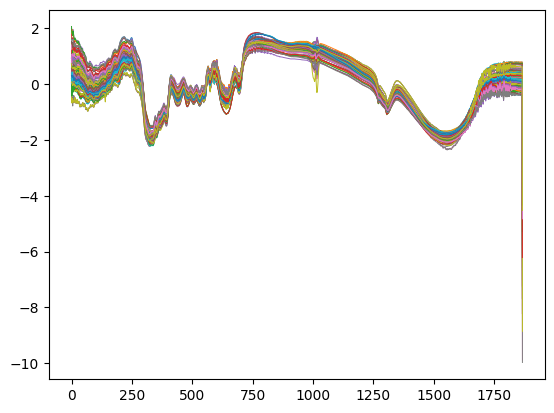

In [50]:
X = data.iloc[:, :-2]
wl = X.columns
X = snv(X.values)
plt.plot(X.T, linewidth = 0.7)
plt.show()

In [51]:
X = savgol_filter(X, window_length = window_len,  polyorder=poly_or, deriv = deriv_num)

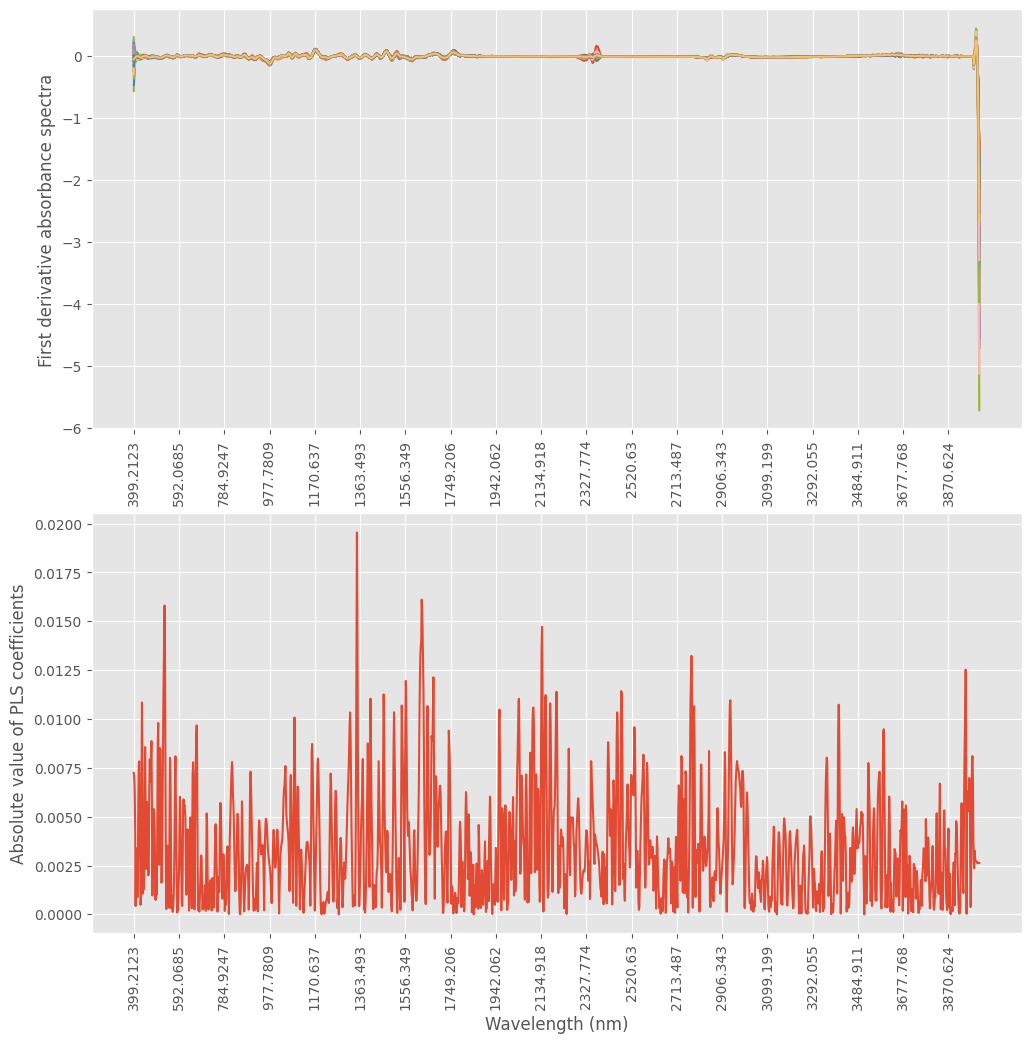

In [52]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pls = PLSRegression(8)
pls.fit(X, y)


# print(np.abs(pls.coef_)reshape(-1,1))
plt.figure(figsize=(12,12))
with plt.style.context(('ggplot')):
    ax1 = plt.subplot(211)
    plt.plot(wl, X.T)
    plt.ylabel('First derivative absorbance spectra')
    plt.gca().set_xticks(np.arange(0, len(wl), 100))
    plt.xticks(rotation=90)
 
    ax2 = plt.subplot(212, sharex=ax1)
    plt.plot(wl, np.abs(pls.coef_).reshape(-1,1))
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Absolute value of PLS coefficients')
    plt.gca().set_xticks(np.arange(0, len(wl), 100))
    plt.xticks(rotation=90)
 
    plt.show()

In [53]:
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
lda.fit(X, y)


print(len(np.abs(lda.coef_).flatten()))

# print(np.abs(lda.coef_)reshape(-1,1))
# plt.figure(figsize=(12,6))
# with plt.style.context(('ggplot')):
#     # ax1 = plt.subplot(211)
#     # plt.plot(wl, X.T)
#     # plt.ylabel('First derivative absorbance spectra')
#     # plt.gca().set_xticks(np.arange(0, len(wl), 100))
#     # plt.xticks(rotation=90)
 
#     ax2 = plt.subplot(211, sharex=ax1)
#     plt.plot(wl, np.abs(lda.coef_)[0])
#     plt.xlabel('Wavelength (nm)')
#     plt.ylabel('Absolute value of PLS coefficients')
#     plt.gca().set_xticks(np.arange(0, len(wl), 100))
#     plt.xticks(rotation=90)

#     ax2 = plt.subplot(212, sharex=ax1)
#     plt.plot(wl, np.abs(lda.coef_)[2])
#     plt.xlabel('Wavelength (nm)')
#     plt.ylabel('Absolute value of PLS coefficients')
#     plt.gca().set_xticks(np.arange(0, len(wl), 100))
#     plt.xticks(rotation=90)

#     # ax2 = plt.subplot(213, sharex=ax1)
#     # plt.plot(wl, np.abs(lda.coef_)[2])
#     # plt.xlabel('Wavelength (nm)')
#     # plt.ylabel('Absolute value of PLS coefficients')
#     # plt.gca().set_xticks(np.arange(0, len(wl), 100))
#     # plt.xticks(rotation=90)
 
#     plt.show()

5607


In [25]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=10, n_classes=2, random_state=42)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Get feature coefficients
coefficients = lda.coef_.flatten()
print(len(coefficients))
# Sort features by the absolute value of their coefficients
feature_importance = np.abs(coefficients)
sorted_indices = np.argsort(-feature_importance)  # Negative for descending order

# Print sorted features and their importance
print("Feature rankings based on LDA coefficients:")
for rank, idx in enumerate(sorted_indices, 1):
    print(f"Rank {rank}: Feature {idx} (Coefficient: {coefficients[idx]:.4f})")


10
Feature rankings based on LDA coefficients:
Rank 1: Feature 2 (Coefficient: 6.5818)
Rank 2: Feature 0 (Coefficient: -2.6429)
Rank 3: Feature 3 (Coefficient: -1.9902)
Rank 4: Feature 1 (Coefficient: -1.2098)
Rank 5: Feature 5 (Coefficient: -0.7424)
Rank 6: Feature 8 (Coefficient: 0.5871)
Rank 7: Feature 4 (Coefficient: 0.5846)
Rank 8: Feature 7 (Coefficient: -0.2512)
Rank 9: Feature 6 (Coefficient: 0.1136)
Rank 10: Feature 9 (Coefficient: 0.0628)


In [352]:
# Get the list of indices that sorts the PLS coefficients in ascending order 
# of the absolute value
sorted_ind = np.argsort(list(np.abs(pls.coef_)))
# Sort spectra according to ascending absolute value of PLS coefficients
Xc = X[:,sorted_ind[0]]

In [353]:
Xc.shape

(159, 1869)

In [354]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score
from joblib import Parallel, delayed
from sys import stdout

def pls_variable_selection(X, y, max_comp, cv=5, n_jobs=-1):
    """
    Optimized PLS variable selection with cross-validation and parallelization.

    Parameters:
    - X: Input feature matrix (n_samples, n_features)
    - y: Target variable
    - max_comp: Maximum number of components for PLS
    - cv: Number of cross-validation folds
    - n_jobs: Number of jobs for parallelization (default is -1, which uses all cores)

    Returns:
    - Xc: Optimized feature matrix after wavelength selection
    - optimal_components: The optimal number of PLS components
    - optimal_wavelengths: Wavelengths (features) to be discarded
    - sorted_indices: Indices of sorted features based on PLS coefficients
    """
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1]))

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)
        
        # Indices of sorted spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_).flatten())
        
        # Sort spectra accordingly
        Xc = X[:, sorted_ind]

        # Print shape of Xc for debugging
        print(f"Shape of Xc at component {i + 1}: {Xc.shape}")

        # Parallelize the MSE computation for each feature subset
        def compute_mse(j):
            pls2 = PLSRegression(n_components=i + 1)
            pls2.fit(Xc[:, j:], y)
            return np.mean(1-cross_val_score(pls2, Xc[:, j:], y, cv=cv))

        # Compute MSE for all feature subsets in parallel
        mse_results = Parallel(n_jobs=n_jobs)(delayed(compute_mse)(j) for j in range(Xc.shape[1] - (i + 1)))

        # Ensure mse_results is the expected length and shape
        print(f"Shape of mse_results at component {i + 1}: {len(mse_results)}")

        # Now we can safely assign to mse[i, :] without dimension mismatch
        mse[i, :len(mse_results)] = mse_results
        
        # Progress display
        comp = 100 * (i + 1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()

    stdout.write("\n")

    # Find the position of minimum MSE
    mse_min_x, mse_min_y = np.unravel_index(np.argmin(mse[np.nonzero(mse)]), mse.shape)

    print("Optimized number of PLS components:", mse_min_x + 1)
    print("Wavelengths to be discarded:", mse_min_y)
    print("Optimized MSEP:", mse[mse_min_x, mse_min_y])

    # Calculate PLS with optimal components and return the result
    pls = PLSRegression(n_components=mse_min_x + 1)
    pls.fit(X, y)

    sorted_ind = np.argsort(np.abs(pls.coef_).flatten())
    Xc = X[:, sorted_ind]
    return Xc[:, mse_min_y:], mse_min_x + 1, mse_min_y, sorted_ind

In [355]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X, y, 15)

Shape of Xc at component 1: (159, 1869)
Shape of mse_results at component 1: 1868
6% completedShape of Xc at component 2: (159, 1869)
Shape of mse_results at component 2: 1867
13% completedShape of Xc at component 3: (159, 1869)
Shape of mse_results at component 3: 1866
20% completedShape of Xc at component 4: (159, 1869)
Shape of mse_results at component 4: 1865
26% completedShape of Xc at component 5: (159, 1869)
Shape of mse_results at component 5: 1864
33% completedShape of Xc at component 6: (159, 1869)
Shape of mse_results at component 6: 1863
40% completedShape of Xc at component 7: (159, 1869)
Shape of mse_results at component 7: 1862
46% completedShape of Xc at component 8: (159, 1869)
Shape of mse_results at component 8: 1861
53% completedShape of Xc at component 9: (159, 1869)
Shape of mse_results at component 9: 1860
60% completedShape of Xc at component 10: (159, 1869)
Shape of mse_results at component 10: 1859
66% completedShape of Xc at component 11: (159, 1869)
Shape of

In [356]:
params = {
    'wav': wav,
    'sorted_ind': sorted_ind
}

In [357]:
### X[:,sorted_ind][:, wav:]

In [358]:
import pickle 
  
# Open a file and use dump() 
with open('file.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(params, file) 

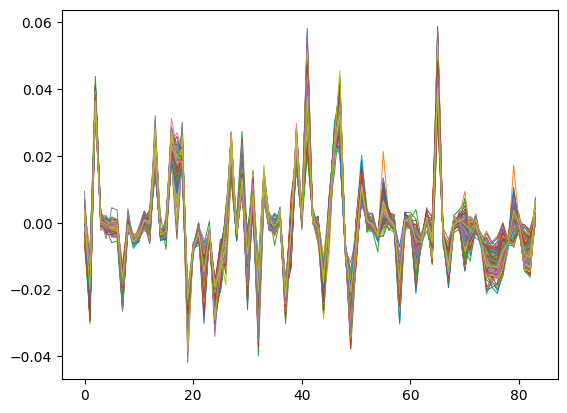

In [359]:
plt.plot(opt_Xc.T, linewidth = 0.7)
plt.show()

In [360]:
opt_Xc.shape

(159, 84)

In [361]:
wl_c = [float(i) for i in list(wl)]

C:\Users\84866\AppData\Local\Temp\ipykernel_8776\1139935945.py:13: MatplotlibDeprecationWarning:

The span_where function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use fill_between instead.

C:\Users\84866\AppData\Local\Temp\ipykernel_8776\1139935945.py:13: MatplotlibDeprecationWarning:

The BrokenBarHCollection class was deprecated in Matplotlib 3.7 and will be removed two minor releases later.



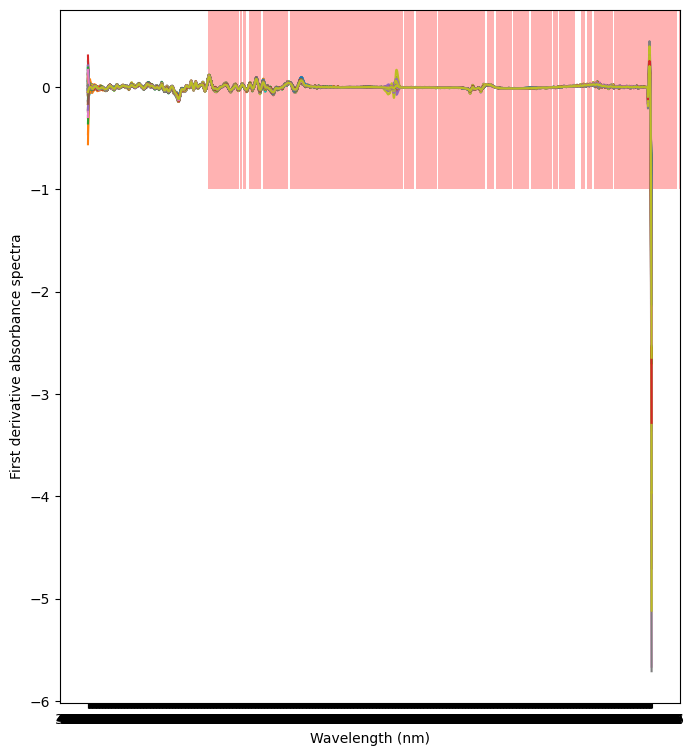

In [362]:
# Get a boolean array according to the indices that are being discarded
ix = np.in1d(wl.ravel(), wl[sorted_ind][:wav])
 
import matplotlib.collections as collections
 
# Plot spectra with superimpose selected bands
fig, ax = plt.subplots(figsize=(8,9))
with plt.style.context(('ggplot')):
    ax.plot(wl, X.T)
    plt.ylabel('First derivative absorbance spectra')
    plt.xlabel('Wavelength (nm)')
 
collection = collections.BrokenBarHCollection.span_where(
    wl_c, ymin=-1, ymax=1, where=ix == True, facecolor='red', alpha=0.3)
ax.add_collection(collection)
 
plt.show()

In [363]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(opt_Xc)

# save
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

In [364]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(scaled_data, y)

In [365]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lda,f)

In [366]:
import plotly.graph_objects as go


# Create a scatter plot
fig = go.Figure()
hover_text = data["File name"].values
color_map = {
    0: 'orange',
    1: 'blue',
    2: 'red'
}
# Add scatter trace
fig.add_trace(go.Scatter(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    mode='markers',  # Display markers and text
    marker=dict(
        size=10, 
        color = y,
        colorscale='Viridis', 
        colorbar=dict(title='Type', tickvals = [0,1,2], ticktext = ['Hỗn hợp', 'Rễ', 'Thân']),  
        showscale=True,
        line=dict(
            width=2,  # Width of the border
            color='black'  # Border color
        )
        ),
    hovertemplate = hover_text,

))

# Update layout
fig.update_layout(
    title='2D Scatter Plot Example',
    xaxis_title='X Axis',
    yaxis_title='Y Axis',
    width = 600,
    height = 600,
)

# Show the plot
fig.show()

In [367]:
# # Open the file in binary mode 
# with open('file.pkl', 'rb') as file: 
      
#     # Call load method to deserialze 
#     params = pickle.load(file) 
  
#     print(params) 

In [368]:
# sorted_ind = params['sorted_ind']
# wav = params['wav']
# X_new = X[:,sorted_ind][:, wav:]

In [369]:
# # load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)
# with open('scaler.pkl', 'rb') as f:
#     scale = pickle.load(f)

# X_scaled = scale.transform(X_new)
# print(X_scaled)
# clf2.predict(X_scaled)